# Understand Brazilian E-commerce co.



In [1]:
# Import all of the libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
import matplotlib as mpl
import plotly.plotly as py
import plotly.tools as tls

mpl.rcParams['patch.force_edgecolor'] = True
%matplotlib inline
import datetime as dt

In [2]:
ls

EDA.ipynb                              olist_order_items_dataset.csv*
README.md                              olist_order_payments_dataset.csv*
Untitled.ipynb                         olist_order_reviews_dataset.csv*
brazilian-ecommerce/                   olist_orders_dataset.csv*
combined_csv.csv                       olist_products_dataset.csv*
combined_csv.ipynb                     olist_sellers_dataset.csv*
olist_customers_dataset.csv*           product_category_name_translation.csv*
olist_geolocation_dataset.csv*         visualizations.ipynb


In [3]:
customer = pd.read_csv("olist_customers_dataset.csv")              
location = pd.read_csv("olist_geolocation_dataset.csv")
order_items = pd.read_csv("olist_order_items_dataset.csv")
payment = pd.read_csv("olist_order_payments_dataset.csv")
review = pd.read_csv("olist_order_reviews_dataset.csv")
orders = pd.read_csv("olist_orders_dataset.csv")
product = pd.read_csv("olist_products_dataset.csv")
seller = pd.read_csv("olist_sellers_dataset.csv")
product_name = pd.read_csv("product_category_name_translation.csv")



#orders.isnull().values.any()

product.isnull().sum()


product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [28]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duration_in_days,on_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.107488,7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.355729,5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.245498,17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.980069,12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.238171,9.238171


In [46]:
stat_cat = orders['order_status'].unique().tolist()
stat_cat

['delivered',
 'invoiced',
 'shipped',
 'processing',
 'unavailable',
 'canceled',
 'created',
 'approved']

In [47]:
status_cat = pd.Categorical(orders['order_status'], categories=stat_cat, ordered=False)
status_cat
                           

[delivered, delivered, delivered, delivered, delivered, ..., delivered, delivered, delivered, delivered, delivered]
Length: 99441
Categories (8, object): [delivered, invoiced, shipped, processing, unavailable, canceled, created, approved]

In [48]:
#reassign status_cat to original "order_Status col
orders['order_status'] = status_cat

In [26]:


#do the same to product_name_category

cat_name = dfproduct['product_category_name'].unique().tolist()
dfproduct['product_category_name'] = pd.Categorical(dfproduct['product_category_name'], categories=cat_name, ordered=False)
dfproduct['product_category_name'].describe()


dfproduct = product.loc.dropna()

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



AttributeError: '_LocIndexer' object has no attribute 'dropna'

In [18]:
dfproduct.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [10]:
#capitalize first character of each word
customer['customer_city'] = customer['customer_city'].str.title()
customer['customer_state'] = customer['customer_state'].str.upper()
customer['customer_state'].value_counts().head(7)

SP    41746
RJ    12852
MG    11635
RS     5466
PR     5045
SC     3637
BA     3380
Name: customer_state, dtype: int64

In [11]:
review['review_comment_title'] = review['review_comment_title'].str.strip().str.lower()

In [64]:
product['product_category_name_english']

KeyError: 'product_category_name_english'

In [13]:
#replace underline w/ spaces
product['product_category_name_english'] = product['product_category_name_english'].str.replace('_',' ').str.lower()
product['product_category_name_english'].value_counts().head(13)

KeyError: 'product_category_name_english'

In [14]:
to_eng_cat_name = product['product_category_name_english'].unique().tolist()
to_eng_cat_name[0]

KeyError: 'product_category_name_english'

In [15]:
#This took me too long to understand.
orders["order_estimated_delivery_date"] = pd.to_datetime(orders["order_estimated_delivery_date"])#make the columns into datetime.
orders["order_delivered_customer_date"] = pd.to_datetime(orders["order_delivered_customer_date"])

orders["duration_in_days"] = (orders["order_estimated_delivery_date"] - orders["order_delivered_customer_date"])/np.timedelta64(1, 'D')
#subtract estimated delivery by actual date received



In [16]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,duration_in_days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7.107488
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,5.355729
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,17.245498
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,12.980069
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,9.238171


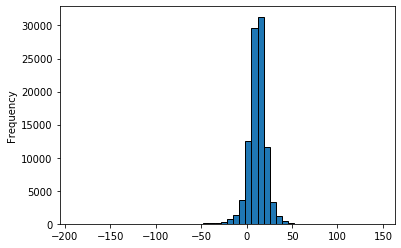

In [17]:
orders['duration_in_days'].plot(kind='hist', bins=50)

In [18]:
orders['on_time'] = ((orders['order_estimated_delivery_date'] - orders['order_delivered_customer_date'])/(np.timedelta64(1, 'D')))


In [19]:
order_items['total_value'] = order_items['price'].add(order_items['freight_value']) #create new column with price & freight included




In [20]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,218.04


In [21]:
order_items.describe(include='all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,total_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320,140.644059
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405,190.724394
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,6.080000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000,55.220000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000,92.320000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000,157.937500


# 2. Visualizations

### Data is better understood when it is visualized




In [22]:
order_items['order_item_id'].value_counts().sort_index()

1     98666
2      9803
3      2287
4       965
5       460
6       256
7        58
8        36
9        28
10       25
11       17
12       13
13        8
14        7
15        5
16        3
17        3
18        3
19        3
20        3
21        1
Name: order_item_id, dtype: int64

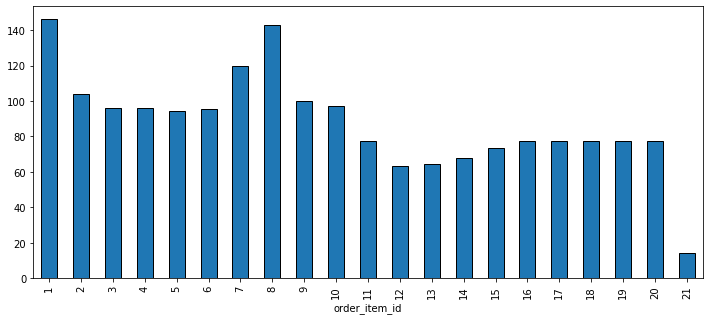

In [23]:
order_items.groupby('order_item_id')['total_value'].mean().plot(kind='bar',figsize=(12,5))




(-1.0999999999999999, 23.099999999999998)

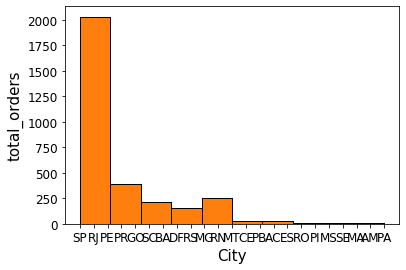

In [24]:
seller['seller_state'].hist(bins=10)
seller['seller_state'].hist(bins=10, grid=False, xlabelsize=12, ylabelsize=12)
plt.xlabel("City", fontsize=15)
plt.ylabel("total_orders",fontsize=15)
plt.xlim()
#most of the orders come from Sao Paolo, nearly 60% of orders come from SP


#seller['seller_state'].describe()
#seller['seller_state'].value_counts()

In [25]:
payment[typ

SyntaxError: unexpected EOF while parsing (<ipython-input-25-ed607d4c2e0a>, line 1)

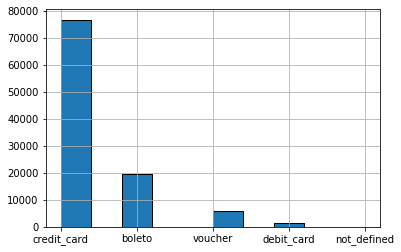

In [26]:
payment['payment_type'].hist(bins=10)
#boleto means check

In [27]:
#payment.payment_type.unique()

payment['payment_type'].value_counts() #frequency of e/ item in a column

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64